# Discrete cosine transformation

Editor: Weipeng Xu

Last modified: 08/07/2025

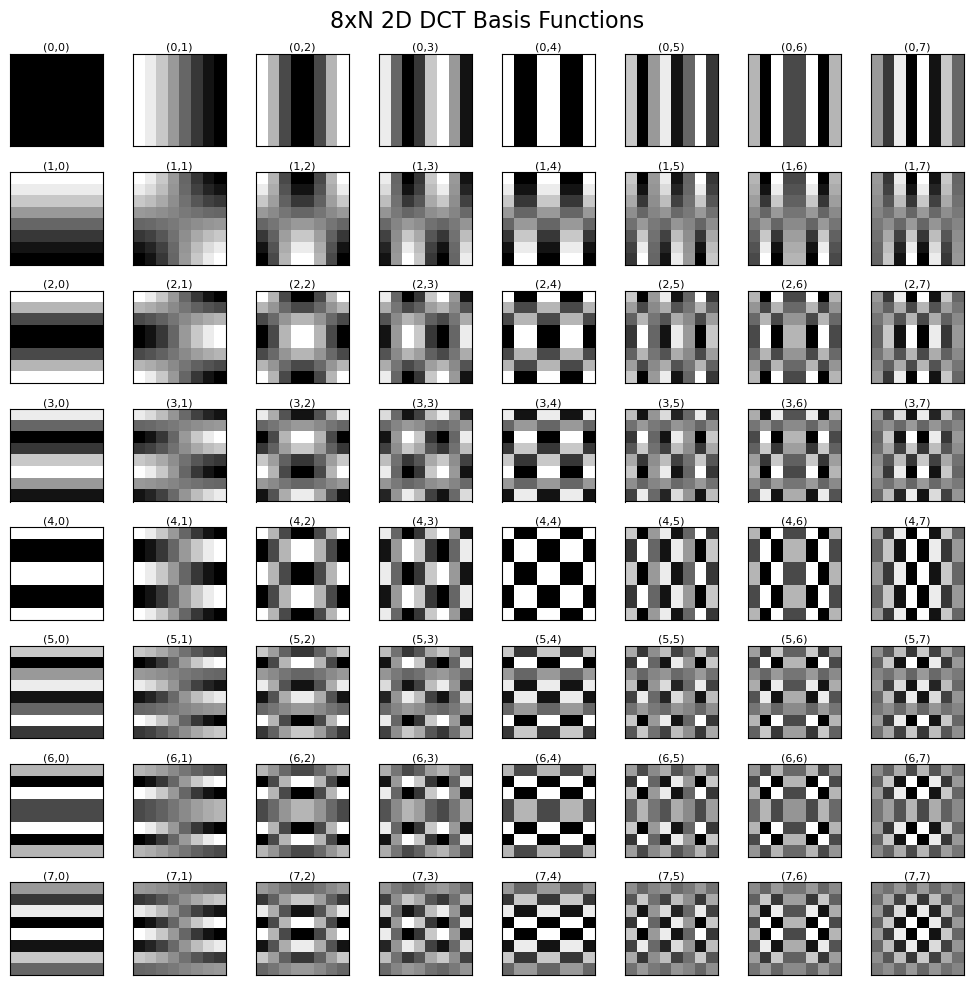

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def plot_dct_basis(N=8, cmap='gray'):
    """
    绘制N×N的二维DCT基图像。
    
    参数:
        N (int): 基图像的尺寸（默认8×8，类似JPEG分块）。
        cmap (str): 颜色映射（默认'gray'，支持'coolwarm'等）。
    """
    # 生成一维DCT基函数
    def dct_basis(k, n, N):
        if k == 0:
            return np.sqrt(1/N) * np.ones(N)
        else:
            return np.sqrt(2/N) * np.cos((np.pi * k * (2*n + 1)) / (2 * N))
    
    # 创建N×N的画布
    fig, axes = plt.subplots(N, N, figsize=(10, 10))
    plt.suptitle(f'{N}xN 2D DCT Basis Functions', fontsize=16)
    
    # 计算并绘制每个基图像
    for k in range(N):
        for l in range(N):
            # 生成基图像（外积）
            basis_k = dct_basis(k, np.arange(N), N).reshape(-1, 1)
            basis_l = dct_basis(l, np.arange(N), N).reshape(1, -1)
            basis_kl = basis_k @ basis_l  # 外积得到2D基
            
            # 绘制基图像
            ax = axes[k, l]
            ax.imshow(basis_kl, cmap=cmap, interpolation='nearest')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(f'({k},{l})', fontsize=8, pad=2)
    
    plt.tight_layout()
    plt.show()

# 示例调用
plot_dct_basis(N=8, cmap='gray')  # 尝试 cmap='gray' 或 'seismic'